<a href="https://colab.research.google.com/github/AjeetSingh02/TimeSeries/blob/master/heart_rate_new_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
! pip install pyramid-arima

In [0]:
%%capture
from pyramid.arima import auto_arima

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

In [0]:
subject = pd.read_excel("subject2.xlsx")
times = pd.date_range('2017-10-09', periods=1800, freq='500ms')
subject["ds"] = times
subject = subject.set_index("ds")

In [0]:
f_times = pd.date_range('2017-10-09', periods=3600, freq='500ms')
future = pd.DataFrame({"ds": f_times[1800:]})

In [0]:
future = future.set_index("ds")

In [0]:
#building the model

model = auto_arima(subject, trace=True, error_action='ignore', suppress_warnings=True, D=1)
model.fit(subject)

In [0]:
forecast = model.predict(n_periods=len(future))
forecast = pd.DataFrame(forecast, index = future.index, columns=['Prediction'])

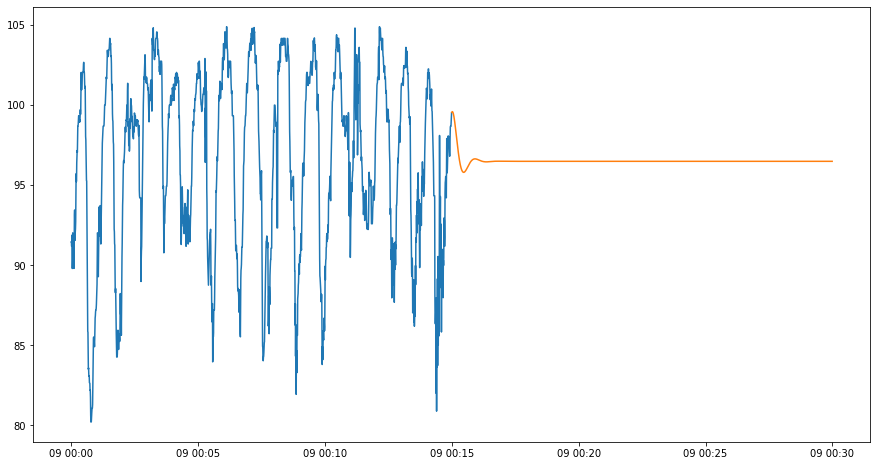

In [0]:
#plot the predictions for validation set
plt.plot(subject, label='Train')
plt.plot(forecast, label='Prediction')
plt.show()